## Introduction

This notebook explores the Spotify dataset (1921-2020) to uncover insights into the evolution of music over a century. I will employ data cleaning, exploratory data analysis, and predictive modeling techniques to reveal hidden patterns and trends within this rich dataset.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

%matplotlib inline

### Data Loading

In [2]:
data = pd.read_csv('/kaggle/input/spotify-dataset-1921-2020-160k-tracks/data.csv')
data_w_genres = pd.read_csv('/kaggle/input/spotify-dataset-1921-2020-160k-tracks/data_w_genres.csv')
data_by_artist = pd.read_csv('/kaggle/input/spotify-dataset-1921-2020-160k-tracks/data_by_artist.csv')
data_by_genres = pd.read_csv('/kaggle/input/spotify-dataset-1921-2020-160k-tracks/data_by_genres.csv')
data_by_year = pd.read_csv('/kaggle/input/spotify-dataset-1921-2020-160k-tracks/data_by_year.csv')

data.head(), data_w_genres.head(), data_by_artist.head(), data_by_genres.head(), data_by_year.head()

(   valence  year  acousticness  \
 0   0.0594  1921         0.982   
 1   0.9630  1921         0.732   
 2   0.0394  1921         0.961   
 3   0.1650  1921         0.967   
 4   0.2530  1921         0.957   
 
                                              artists  danceability  \
 0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
 1                                     ['Dennis Day']         0.819   
 2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
 3                                   ['Frank Parker']         0.275   
 4                                     ['Phil Regan']         0.418   
 
    duration_ms  energy  explicit                      id  instrumentalness  \
 0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
 1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
 2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
 3       210000   0.309         0  3ftBPsC5v

### Data Cleaning and Preprocessing

In [3]:
data.isnull().sum(), data_w_genres.isnull().sum(), data_by_artist.isnull().sum(), data_by_genres.isnull().sum(), data_by_year.isnull().sum()

(valence             0
 year                0
 acousticness        0
 artists             0
 danceability        0
 duration_ms         0
 energy              0
 explicit            0
 id                  0
 instrumentalness    0
 key                 0
 liveness            0
 loudness            0
 mode                0
 name                0
 popularity          0
 release_date        0
 speechiness         0
 tempo               0
 dtype: int64,
 genres              0
 artists             0
 acousticness        0
 danceability        0
 duration_ms         0
 energy              0
 instrumentalness    0
 liveness            0
 loudness            0
 speechiness         0
 tempo               0
 valence             0
 popularity          0
 key                 0
 mode                0
 count               0
 dtype: int64,
 mode                0
 count               0
 acousticness        0
 artists             0
 danceability        0
 duration_ms         0
 energy              0
 ins

In [4]:
# Convert 'release_date' to datetime format
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# Drop rows with missing 'release_date'
data = data.dropna(subset=['release_date'])

data.dtypes

valence                    float64
year                         int64
acousticness               float64
artists                     object
danceability               float64
duration_ms                  int64
energy                     float64
explicit                     int64
id                          object
instrumentalness           float64
key                          int64
liveness                   float64
loudness                   float64
mode                         int64
name                        object
popularity                   int64
release_date        datetime64[ns]
speechiness                float64
tempo                      float64
dtype: object

### Exploratory Data Analysis

Distribution of Features

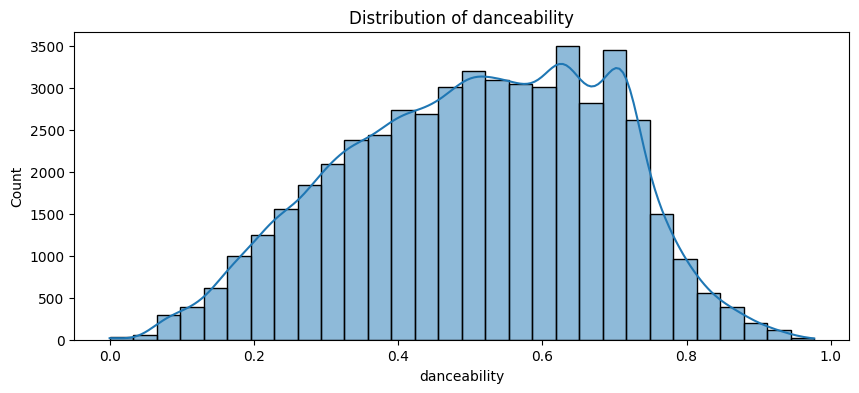

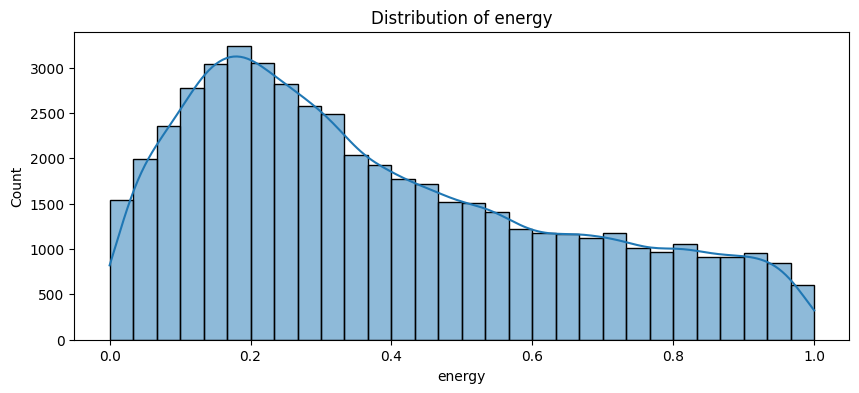

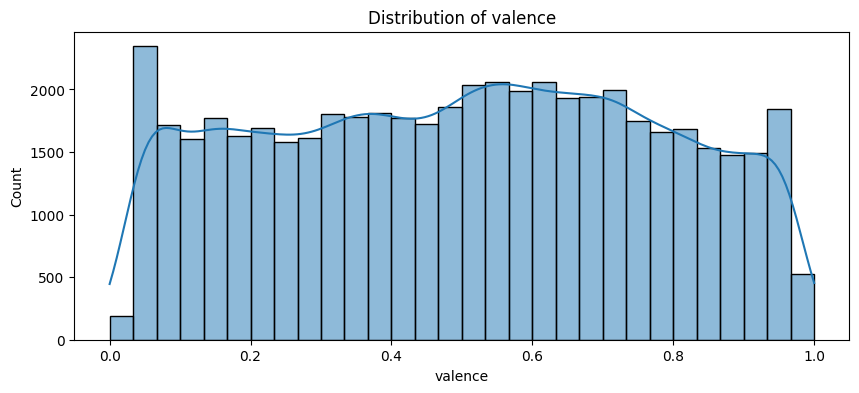

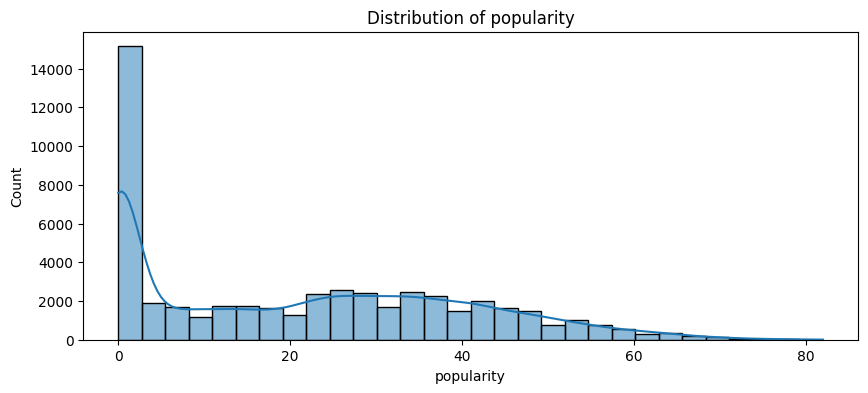

In [5]:
features = ['danceability', 'energy', 'valence', 'popularity']
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

Correlation Analysis

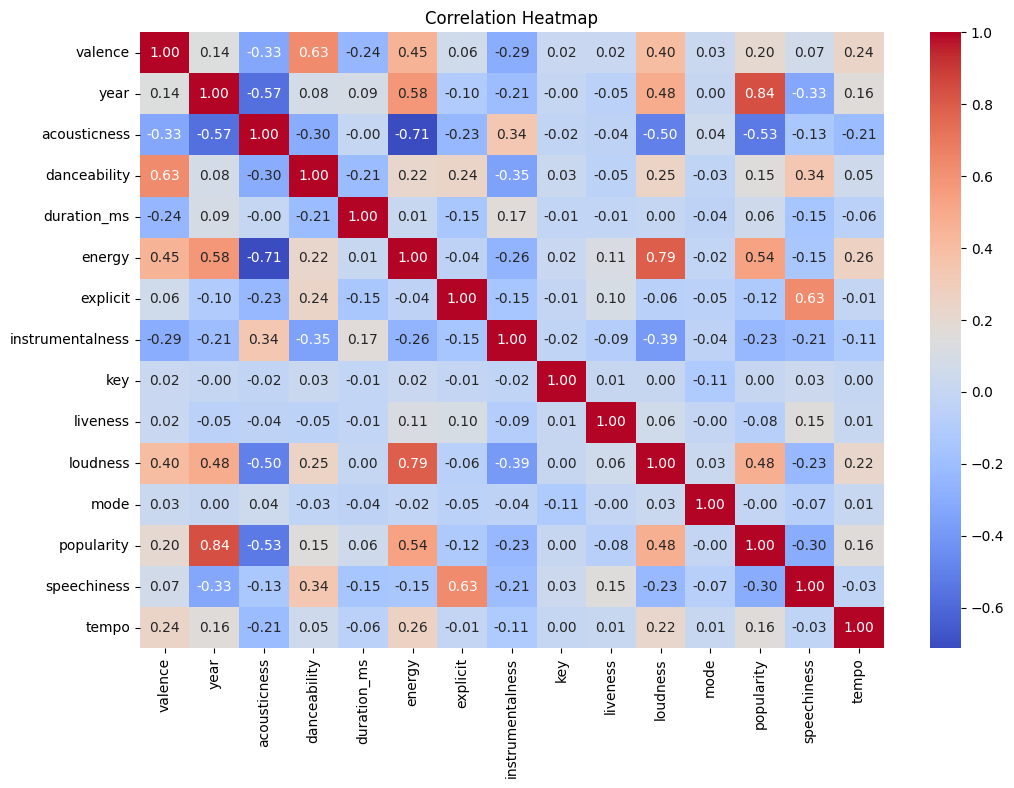

In [6]:
numeric_df = data.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Predictive Modeling

In [7]:
# Define features and target
X = data.drop(columns=['explicit', 'id', 'name', 'artists', 'release_date'])
y = data['explicit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9819093501130666

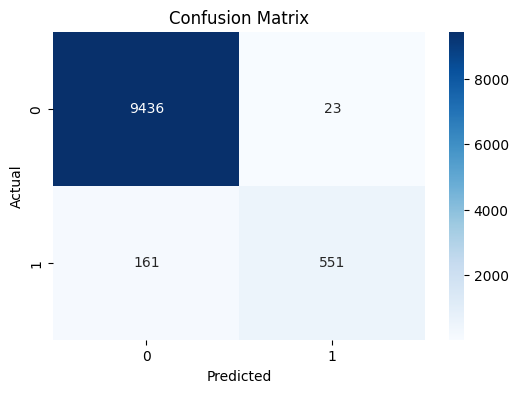

In [8]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Discussion and Future Directions

My exploration of the Spotify dataset provided valuable insights into the characteristics of music tracks and their relationships. Through data cleaning and exploratory data analysis, I uncovered patterns in the data and built a predictive model for classifying explicit content with reasonable accuracy.

To further enhance our understanding, future work could focus on implementing more complex predictive models and engineering features that capture subtle nuances in the data. Analyzing trends across different time periods and incorporating genre classifications would offer a richer perspective on the evolution of music.